# Chapter 11 - 최소제곱법 응용: 실제 데이터를 활용한 최소제곱법

In [1]:
import numpy as np
import pandas as pd
import sympy as sym
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

import statsmodels.api as sm


# 폰트 설정
%config InlineBackend.figure_format = 'retina'
plt.rcParams["axes.unicode_minus"] = False
plt.rc('font', family='NanumBarunGothic')


## 자전거 대여 연습 문제

### 연습문제 11-1. 강우량이 없는 날 제거 → 분석과 그래프 생성을 강우량이 0이 아닌 데이터에 대해서만 반복
- R-square 높아지고 양수 예측 대여량이 증가할까?


In [2]:
# Data citation: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand 
#                prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
# data source website: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url,sep=',',encoding='unicode_escape')

# let's have a look
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


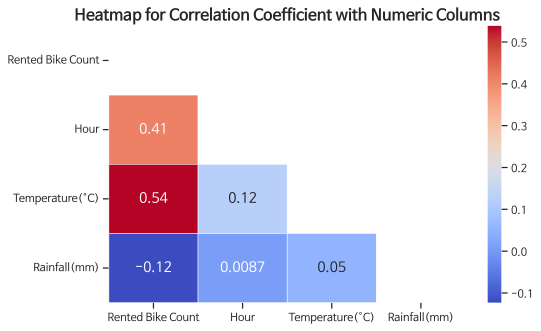

In [3]:
plt.figure(figsize=(8,5))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(data[['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)']].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data[['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)']].corr(),
            annot=True,         # 실제 값을 표시한다
            mask=mask,          # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,      # 경계면 실선으로 구분하기
            cmap='coolwarm')

plt.title("Heatmap for Correlation Coefficient with Numeric Columns", fontsize=16, fontweight='bold')
plt.show()

In [4]:
data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)
data

C:\Users\aryij\AppData\Local\Temp\ipykernel_35752\3222341694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,No Holiday,Yes


In [5]:
# p.234 설계 행렬을 만들고 절편을 추가
desmat = data[["Rainfall(mm)", "Seasons"]].to_numpy()
desmat = np.append(desmat, np.ones((desmat.shape[0], 1)), axis=1)
desmat

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [6]:
# DV을 추출
y = data[["Rented Bike Count"]].to_numpy()

# 최소제곱법 사용하여 모델을 데이터에 적합
beta = np.linalg.lstsq(desmat, y, rcond=None)
beta[0]

array([[-80.52367456],
       [369.12668112],
       [530.49459615]])

In [7]:
print("강우량 없는 날을 제거하지 않은 데이터의 강우량 beta 값 :", beta[0][0])
print("강우량 없는 날을 제거하지 않은 데이터의 계절 beta 값 :", beta[0][1])

강우량 없는 날을 제거하지 않은 데이터의 강우량 beta 값 : [-80.52367456]
강우량 없는 날을 제거하지 않은 데이터의 계절 beta 값 : [369.12668112]


In [8]:
# statsmodel 사용
# 데이터를 추출 (판다스 데이터프레임으로 유지)
desmat_df = data[["Rainfall(mm)", "Seasons"]]
obsdata_df = data[["Rented Bike Count"]]

# 모델 생성 및 적합 (절편을 명시적으로 추가해야 함)
desmat_df = sm.add_constant(desmat_df) 
model = sm.OLS(obsdata_df,desmat_df).fit()
print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     468.8
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          3.80e-194
Time:                        22:09:49   Log-Likelihood:                -68654.
No. Observations:                8760   AIC:                         1.373e+05
Df Residuals:                    8757   BIC:                         1.373e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          530.4946      9.313     56.963   

In [9]:
data_no_rain = data[data["Rainfall(mm)"] != 0.0]

print("원본 데이터프레임 shape:", data.shape)
print("강우량 0인 데이터 제거한 데이터프레임 shape:", data_no_rain.shape)

원본 데이터프레임 shape: (8760, 14)
강우량 0인 데이터 제거한 데이터프레임 shape: (528, 14)


In [10]:
desmat_no_rain_df = data_no_rain[["Rainfall(mm)", "Seasons"]]
obsdata_no_rain_df = data_no_rain[["Rented Bike Count"]]

# 모델 생성 및 적합 (절편을 명시적으로 추가해야 함)
desmat_no_rain_df = sm.add_constant(desmat_no_rain_df) 
model_no_rain = sm.OLS(obsdata_no_rain_df, desmat_no_rain_df).fit()
print( model_no_rain.summary() )

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     7.618
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           0.000548
Time:                        22:09:49   Log-Likelihood:                -3681.4
No. Observations:                 528   AIC:                             7369.
Df Residuals:                     525   BIC:                             7382.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          152.1169     22.954      6.627   

In [11]:
desmat_no_rain = data_no_rain[["Rainfall(mm)", "Seasons"]].to_numpy()
desmat_no_rain = np.append(desmat_no_rain, np.ones((desmat_no_rain.shape[0], 1)), axis=1)
y_no_rain = data_no_rain[["Rented Bike Count"]].to_numpy()

# 최소제곱법 사용하여 모델을 데이터에 적합
beta_no_rain = np.linalg.lstsq(desmat_no_rain, y_no_rain, rcond=None)
beta_no_rain[0]


array([[ -9.82999823],
       [ 48.42999142],
       [152.11692428]])

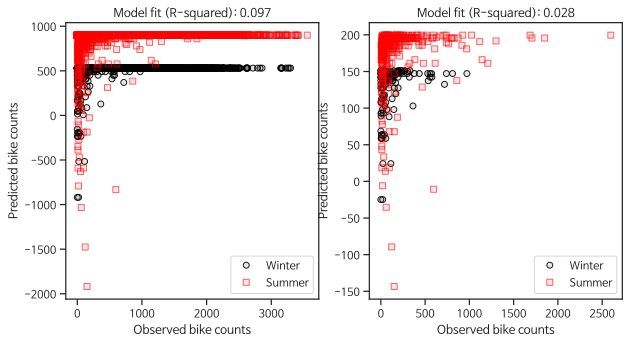

In [12]:
yHat = desmat @ beta[0]
yHat_no_rain = desmat_no_rain @ beta_no_rain[0]

# R-squared 구하기
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2
modelfit_no_rain = np.corrcoef(y_no_rain.T,yHat_no_rain.T)[0,1]**2

# plot 생성
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(y[desmat[:,1]==0],
         yHat[desmat[:,1]==0],
         'o',markerfacecolor=(0,0,0,.1),
         markeredgecolor=(0,0,0,.9),label='Winter')
axes[0].plot(y[desmat[:,1]==1],yHat[desmat[:,1]==1],'s',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')
axes[0].legend()
axes[0].set_title(f'Model fit (R-squared): {modelfit:.3f}')
axes[0].set_xlabel('Observed bike counts')
axes[0].set_ylabel('Predicted bike counts')

axes[1].plot(y_no_rain[desmat_no_rain[:,1]==0],
         yHat_no_rain[desmat_no_rain[:,1]==0],
         'o',markerfacecolor=(0,0,0,.1),
         markeredgecolor=(0,0,0,.9),label='Winter')
axes[1].plot(y_no_rain[desmat_no_rain[:,1]==1],
             yHat_no_rain[desmat_no_rain[:,1]==1],
             's',markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),
             label='Summer')
axes[1].legend()
axes[1].set_title(f'Model fit (R-squared): {modelfit_no_rain:.3f}')

axes[1].set_xlabel('Observed bike counts')
axes[1].set_ylabel('Predicted bike counts')

plt.show()

### 연습 문제 11-2. 설계 행렬에서 계절을 기온으로 바꾸고회귀를 실행하여 (모든 날 사용) 그림 재현

In [13]:
desmat_temp = data[["Rainfall(mm)", "Temperature(°C)"]].to_numpy()
desmat_temp = np.append(desmat_temp, np.ones((desmat_temp.shape[0], 1)), axis=1)
desmat_temp

array([[ 0. , -5.2,  1. ],
       [ 0. , -5.5,  1. ],
       [ 0. , -6. ,  1. ],
       ...,
       [ 0. ,  2.6,  1. ],
       [ 0. ,  2.1,  1. ],
       [ 0. ,  1.9,  1. ]])

In [14]:
# DV을 추출
y_temp = data[["Rented Bike Count"]].to_numpy()

# 최소제곱법 사용하여 모델을 데이터에 적합
beta_temp = np.linalg.lstsq(desmat_temp, y_temp, rcond=None)
beta_temp[0]

array([[-86.06170761],
       [ 29.48981803],
       [337.48329388]])

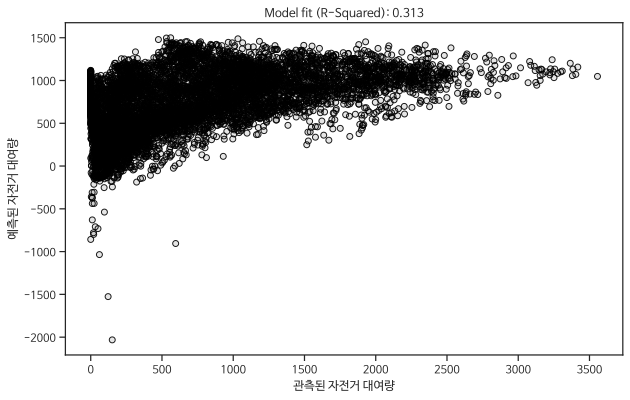

In [15]:
yHat_temp = desmat_temp @ beta_temp[0]

# R-square 구하기
modelfit_temp = np.corrcoef(y_temp.T,yHat_temp.T)[0,1]**2

# 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(y_temp,yHat_temp,'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9))
plt.xlabel('관측된 자전거 대여량')
plt.ylabel('예측된 자전거 대여량')
plt.title(f'Model fit (R-Squared): {modelfit_temp:.3f}')
plt.show()

## 다중공선성 연습 문제

### 연습 문제 11-3. 온도와 강우량의 선형 가중 결합으로 정의된 4번째 회귀식을 포함하는 새로운 설꼐 행렬을 생성하고 모델 적합
- 설계 행렬의 열이 4개지만 계수가 3인지 확인하고 설계 행렬의 상관계수 행렬 계산
- 모델 적합
    - 왼쪽 역으로 직접 구현
    - `numpy`의 `lstsqr` 함수 사용
    - `statsmodels` 사용

In [16]:
# 선형 가중 결합 생성
new_variable = (4 * desmat_temp[:, 0]) + (2 * desmat_temp[:, 1])

# 설계 행렬에 선형 가중 결합으로 정의된 4번째 회귀식 포함
desmat_temp_mod = np.append(desmat_temp,new_variable.reshape(-1,1),axis=1)

print("설계 행렬 크기:", desmat_temp_mod.shape)
print("설계 행렬 계수:", np.linalg.matrix_rank(desmat_temp_mod))

설계 행렬 크기: (8760, 4)
설계 행렬 계수: 3


In [17]:
# np.corrcoef는 행을 변수로 보고 열을 관측치로 본다
# 현재 데이터 (desmat_temp_mod)는 행이 관측치고 열이 변수이다
# 따라서, 전치행렬을 np.corrcoef에 넣어야 한다

np.round(np.corrcoef(desmat_temp_mod.T),5)

c:\Users\aryij\anaconda3\envs\football\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\aryij\anaconda3\envs\football\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[1.     , 0.05028,     nan, 0.2329 ],
       [0.05028, 1.     ,     nan, 0.98298],
       [    nan,     nan,     nan,     nan],
       [0.2329 , 0.98298,     nan, 1.     ]])

In [18]:
# 1. 왼쪽 역으로 직접 구현
X_leftinv = np.linalg.inv(desmat_temp_mod.T @ desmat_temp_mod) @ desmat_temp_mod.T
X_leftinv

array([[ 1.36693319e-05,  1.26361847e-05,  1.43051147e-05, ...,
         1.22388204e-05,  1.20004018e-05,  1.27951304e-05],
       [-3.17891439e-08,  1.19209290e-07,  4.76837158e-07, ...,
         1.58945719e-08, -1.03314718e-07,  1.03314718e-07],
       [ 3.01059342e-04,  3.04140715e-04,  3.09276337e-04, ...,
         2.20943641e-04,  2.26079263e-04,  2.28133512e-04],
       [-7.23203023e-06, -6.97374344e-06, -7.39097595e-06, ...,
        -4.25179799e-06, -4.43061193e-06, -4.62929408e-06]])

In [38]:
# 왼쪽 역행렬 사용해서 beta, y_hat 구하기
beta_left = X_leftinv @ y_temp
y_hat_left = desmat_temp_mod @ beta_left
r2_left = np.corrcoef(y_temp.T, y_hat_left.T)[0, 1] ** 2

In [39]:
# 2. Numpy lstsqr 사용
beta_lstsqr = np.linalg.lstsq(desmat_temp_mod, y_temp, rcond=None)
y_hat_lstsqr = desmat_temp_mod @ beta_lstsqr[0]
r2_lstsqr = np.corrcoef(y_temp.T, y_hat_lstsqr.T)[0, 1] ** 2

In [40]:
# 3. statsmodels 사용
desmat_temp_mod_df = pd.DataFrame(desmat_temp_mod)
obsdata_no_rain_df = data[["Rented Bike Count"]]


# 모델 생성 및 적합 (절편을 명시적으로 추가해야 함)
desmat_temp_mod_df = sm.add_constant(desmat_temp_mod_df)
model_temp_mod = sm.OLS(obsdata_df, desmat_temp_mod_df).fit()

beta_statsmodels = model_temp_mod.params.values
r2_statsmodels = model_temp_mod.rsquared

print(model_temp_mod.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1992.
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:10:18   Log-Likelihood:                -67458.
No. Observations:                8760   AIC:                         1.349e+05
Df Residuals:                    8757   BIC:                         1.349e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0            -31.7251      1.230    -25.788      0.0

c:\Users\aryij\anaconda3\envs\football\Lib\site-packages\statsmodels\tsa\tsatools.py:161: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)


In [41]:
print('데이터에 모델 저장 (R-squared):')
print(f'  왼쪽 역      : {r2_left:.4f}')
print(f'  Numpy lstsqr: {r2_lstsqr:.4f}')
print(f'  statsmodels : {r2_statsmodels:.4f}')

print(' ')
print('베타 계수:')
print(f'  왼쪽 역      : {np.round(beta_left.T,3)}')
print(f'  Numpy lstsqr: {np.round(beta_lstsqr[0].T,3)}')
print(f'  statsmodels : {np.round(beta_statsmodels.T,3)}')

데이터에 모델 저장 (R-squared):
  왼쪽 역      : 0.1503
  Numpy lstsqr: 0.3126
  statsmodels : 0.3126
 
베타 계수:
  왼쪽 역      : [[100.707   0.435 337.483  11.031]]
  Numpy lstsqr: [[-31.725  56.658 337.483 -13.584]]
  statsmodels : [-31.725  56.658 337.483 -13.584]


## 정규화 연습 문제

### 연습 문제 11-4. 정규화 효과 살펴보기
1. $\gamma=0, \gamma=.01$을 사용하여 $(X^TX+\gamma|X|{_F}^2I)^T$ 구현
    - 보다 안정적인 역행렬을 갖도록 만들어주는 방식
2. 두 행렬의 크기 출력
3. 다중공선성 있는 설계 행렬과 없는 설계 행렬에 정규화와 함께 최소제곱법 사용 → 데이터에 대한 적합성 $R^2$로 계한사는 코드 작성
    - 0 ~ 0.2 사이의 $\gamma$ 값 범위에 대해 구현하는 for 반복문에 넣는다
    - 결과 시각화


In [42]:
gamma_0 = 0
gamma = 0.01

In [43]:
gamma_0_norm_sqaure = gamma_0 *np.linalg.norm(desmat_temp_mod) ** 2

# 수식 구현 (X.T@X + (r|X|^2 * I)).T
expression = (desmat_temp_mod.T @ desmat_temp_mod) + (gamma_0_norm_sqaure * np.eye(desmat_temp_mod.shape[1]))
expression

array([[1.13422900e+04, 2.27151200e+04, 1.30250000e+03, 9.07994000e+04],
       [2.27151200e+04, 2.70361852e+06, 1.12854400e+05, 5.49809752e+06],
       [1.30250000e+03, 1.12854400e+05, 8.76000000e+03, 2.30918800e+05],
       [9.07994000e+04, 5.49809752e+06, 2.30918800e+05, 1.13593926e+07]])

In [44]:
# 왼쪽 역행렬의 크기, 계수 구한다
leftinv = np.linalg.inv(expression)

print(f"gamma=0일 때, inv(X'X + {gamma_0}*I) 크기: {leftinv.shape}")
print(f"gamma=0일 때, inv(X'X + {gamma_0}*I) 계수: {np.linalg.matrix_rank(leftinv)}")

gamma=0일 때, inv(X'X + 0*I) 크기: (4, 4)
gamma=0일 때, inv(X'X + 0*I) 계수: 3


In [45]:
gamma_norm_sqaure = gamma * np.linalg.norm(desmat_temp_mod) ** 2

# 수식 구현 (X.T@X + (r|X|^2 * I)).T
expression = (desmat_temp_mod.T @ desmat_temp_mod) + (gamma_norm_sqaure * np.eye(desmat_temp_mod.shape[1]))
expression

array([[1.52173424e+05, 2.27151200e+04, 1.30250000e+03, 9.07994000e+04],
       [2.27151200e+04, 2.84444965e+06, 1.12854400e+05, 5.49809752e+06],
       [1.30250000e+03, 1.12854400e+05, 1.49591134e+05, 2.30918800e+05],
       [9.07994000e+04, 5.49809752e+06, 2.30918800e+05, 1.15002238e+07]])

In [46]:
# 왼쪽 역행렬의 크기, 계수 구한다
leftinv = np.linalg.inv(expression)

print(f"gamma=0.01일 때, inv(X'X + {gamma}*I) 크기: {leftinv.shape}")
print(f"gamma=0.01일 때, inv(X'X + {gamma}*I) 계수: {np.linalg.matrix_rank(leftinv)}")

gamma=0.01일 때, inv(X'X + 0.01*I) 크기: (4, 4)
gamma=0.01일 때, inv(X'X + 0.01*I) 계수: 4


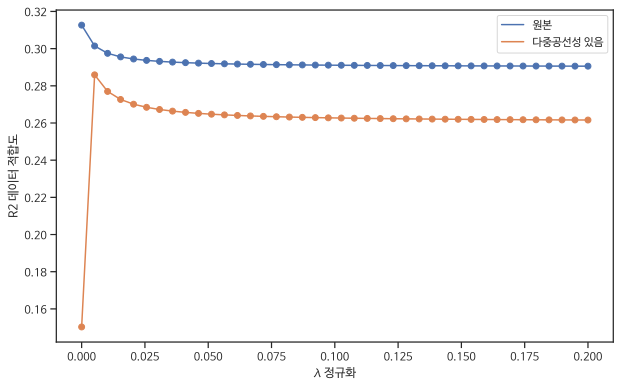

In [47]:
# 다중공선성 있는 설계 행렬과 없는 설계 행렬에 정규화와 함께 최소제곱법 사용
gammas = np.linspace(0, 0.2, 40)

# 설계 행렬들 list
design_matrices = [desmat_temp, desmat_temp_mod]
labels = ["원본", "다중공선성 있음"]

# r2 값을 저장할 리스트 생성
r2_values = {label: [] for label in labels}

for gamma in gammas:
    for idx, matrix in enumerate(design_matrices):
        gamma_norm_sqaure = gamma * np.linalg.norm(matrix) ** 2
        expression = (matrix.T @ matrix) + (gamma_norm_sqaure * np.eye(matrix.shape[1]))
        leftinv = np.linalg.inv(expression) @ matrix.T
        beta = leftinv @ y_temp
        y_hat = matrix @ beta
        r2 = np.corrcoef(y_temp.T, y_hat.T)[0, 1] ** 2
        r2_values[labels[idx]].append(r2)

# 라인 플롯 그리기
plt.figure(figsize=(10, 6))
for label in labels:
    plt.plot(gammas, r2_values[label], label=label)

    # 데이터 포인트
    plt.scatter(gammas, r2_values[label])

plt.xlabel("λ 정규화")
plt.ylabel("R2 데이터 적합도")
plt.legend()
plt.show()


## 다항식 회귀 연습 문제

### 연습 문제 11-5. 0 ~ 9까지 다양한 차수를 사용하여 다항식 회귀를 적합시키는 것이다.
- for 반복문에서 회귀와 예측된 데이터값을 다시 계산하고, 시각화

Text(0, 0.5, '두 배까지 걸리는 시간 (연)')

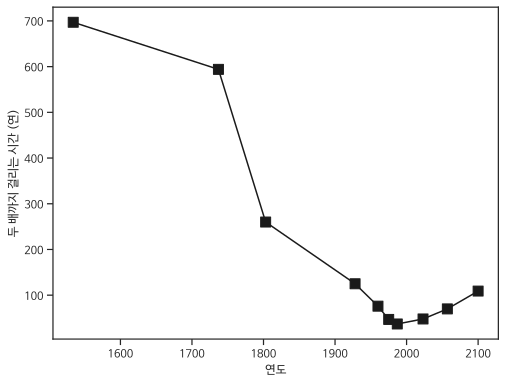

In [29]:
# the data
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

N = len(year)


# plot it
plt.figure(figsize=(8,6))
plt.plot(year,doubleTime,'ks-',markersize=10)

plt.xlabel('연도')
plt.ylabel('두 배까지 걸리는 시간 (연)')

In [30]:
beta = np.polyfit(year, doubleTime, 3)
yHat = np.polyval(beta, year)

C:\Users\aryij\AppData\Local\Temp\ipykernel_35752\2235589007.py:17: RankWarning: Polyfit may be poorly conditioned
  beta_poly = np.polyfit(year, doubleTime, degree)


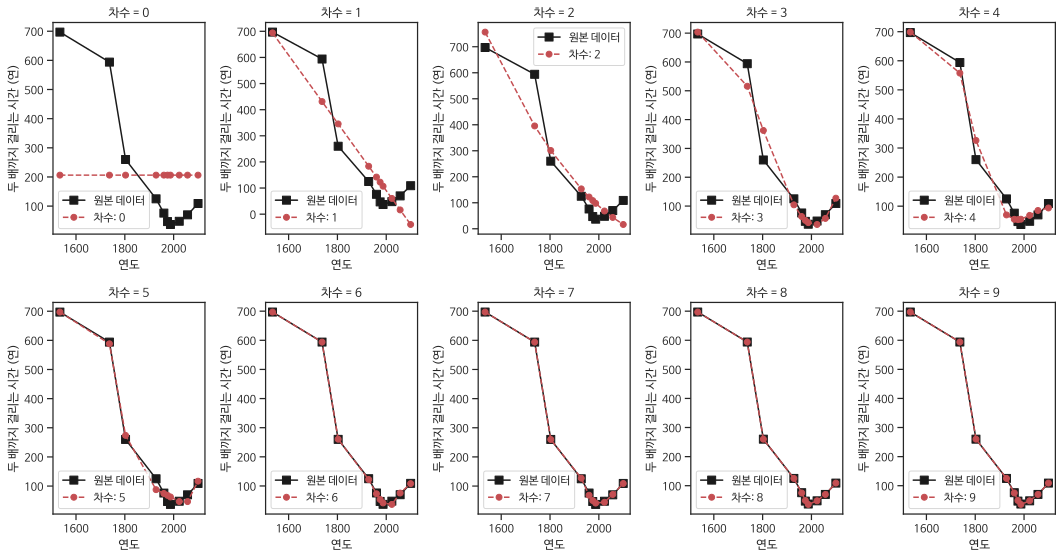

In [31]:
# the data
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

N = len(year)


degrees = np.arange(0, 10)

# subplots 생성
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

# flatten()을 통해 axes를 1차원 array로 펴준다
axes = axes.flatten()

for i, degree in enumerate(degrees):
    beta_poly = np.polyfit(year, doubleTime, degree)
    yHat_poly = np.polyval(beta_poly, year)

    # 각 subplot에 그래프 그리기
    axes[i].plot(year, doubleTime, 'ks-', markersize=8, label='원본 데이터')
    axes[i].plot(year, yHat_poly, 'ro--', label=f'차수: {degree}')
    
    # 레이블 추가
    axes[i].set_xlabel('연도')
    axes[i].set_ylabel('두 배까지 걸리는 시간 (연)')
    axes[i].set_title(f'차수 = {degree}')
    axes[i].legend()

# 전체 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()

## 그리드 서치 연습 문제

### 연습 문제 11-6. 그림 11-8을 그림 주위의 텍스트에 제시된 지침에 따라 재현 → 비교한 회귀 계수 출력

In [32]:
# NOTE: data and model from the previous chapter
numcourses = [13,4,12,3,14,13,12,9,11,7,13,11,9,2,5,7,10,0,9,7]
happiness  = [70,25,54,21,80,68,84,62,57,40,60,64,45,38,51,52,58,21,75,70]

# 설계 행렬
X = np.hstack((np.ones((20,1)),np.array(numcourses,ndmin=2).T))
beta = np.linalg.lstsq(X,happiness,rcond=None)[0]

In [ ]:
import time

def grid_search_result_time(X, beta, grid_resolution, max_intercepts=80, max_slopes=6):
    start = time.time()  # 시작 시간 저장

    # 절편, 기울기 설정
    intercepts = np.linspace(0,max_intercepts, grid_resolution)
    slopes = np.linspace(0,max_slopes, grid_resolution)
    
    # 제곱합 오차 저장할 zero matrix 생성
    SSEs = np.zeros((len(intercepts),len(slopes)))

    # intercept, slope에 따른 y_hat, SSE 계산 후 SSEs에 저장
    for intercept_idx, intercept in enumerate(intercepts):
        for slope_idx, slope in enumerate(slopes):

            # y_hat 계산
            y_hat = X @ np.array([intercept,slope]).T

            # sum of squared errors
            SSEs[intercept_idx,slope_idx] = np.sum((y_hat-happiness)**2)


    # 가장 작은 SSE (제곱합 오차) index 찾는다
    i, j = np.unravel_index(np.argmin(SSEs),SSEs.shape)

    # 가장 작은 SSE에 해당하는 절편, 기울기 찾는다
    min_intercept,min_slope = intercepts[i], slopes[j]

    print(f'Intercept      : {beta[0]:.2f},    slope      : {beta[1]:.2f}')
    print(f'최적의 Intercept: {min_intercept:.2f},    최적의 slope: {min_slope:.2f}')
    print("="*50)
    print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

In [ ]:
grid_search_result_time(X, beta, 20)

Intercept      : 23.13,    slope      : 3.70
최적의 Intercept: 25.26,    최적의 slope: 3.47
time : 0.009000301361083984


In [ ]:
grid_search_result_time(X, beta, 100)

Intercept      : 23.13,    slope      : 3.70
최적의 Intercept: 22.63,    최적의 slope: 3.76
time : 0.16799330711364746


In [ ]:
grid_search_result_time(X, beta, 500)

Intercept      : 23.13,    slope      : 3.70
최적의 Intercept: 23.09,    최적의 slope: 3.70
time : 3.803029775619507


In [37]:
grid_search_resunt_time(X, beta, 1000)

Intercept      : 23.13,    slope      : 3.70
최적의 Intercept: 23.14,    최적의 slope: 3.70
time : 15.228244543075562
